In [2]:
from index import NeuralNetwork; # CUSTOM NN FROM SCRATCH
import matplotlib.pyplot as plt;
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import activations  
import numpy as np
import cv2


-----


## Testing on training data


---


Neural network thinks this number is a zero




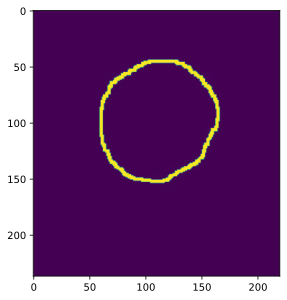

In [85]:
def preprocess_image(image_path):
    """
    Preprocess an image: resize, normalize, and reshape.

    Parameters:
    - image_path (str): Path to the input image file.

    Returns:
    - image_original (numpy.ndarray): Original image array.
    - image_normalized (numpy.ndarray): Normalized image array (values in [0, 1]), reshaped to (1, 784).
    """
    try:
        # Read the image using OpenCV
        image_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if image_original is None:
            raise ValueError(f"Image not found or unable to read the image at {image_path}")

        # Resize to match MNIST digit size (28x28)
        image_resized = cv2.resize(image_original, (28, 28))
        
        # Normalize pixel values to [0, 1]
        image_normalized = image_resized.astype('float32') / 255.0
        
        # Flatten the image to a 1D array and reshape it to (1, 784)
        image_normalized = image_normalized.flatten().reshape(1, -1)
        
        return image_original, image_normalized
    
    except Exception as e:
        print(f"Error preprocessing image: {e}")
        return None, None

labels = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

# Load and preprocess images
image_dir = "./numbers"  # Replace with your image directory
def LoadImages(image_dir="./numbers"):
    """
    Load and preprocess images for a digit recognition neural network.

    Parameters:
    - image_dir (str): Directory path containing images (default: "./numbers").

    Returns:
    - images_normalized (list): List of normalized image arrays (values in [0, 1]).
    - images_original (list): List of original image arrays.
    """
    try:
        # Load and preprocess images
        images_normalized = []
        images_original = []

        for label in labels:
            image_path = f"{image_dir}/{label}.jpg"
            image_original, image_normalized = preprocess_image(image_path)
            
            if image_original is not None and image_normalized is not None:
                images_original.append(image_original)
                images_normalized.append(image_normalized)
            else:
                print(f"Error processing image: {image_path}")

        return images_normalized, images_original
    
    except Exception as e:
        print(f"Error loading and processing images: {e}")
        return [], []

normalized_images, original_images = LoadImages()

# Convert to NumPy arrays
normalized_images = np.array(normalized_images).reshape(len(normalized_images), -1)  # Flatten the images

# Your Number that you want to process
ideal_values = np.eye(10)  # One-hot encoding for the ideal output values

NN = NeuralNetwork(
    input=normalized_images,  # Use the entire dataset as input
    hidden_layer=[18, 18],
    activation_hidden=(activations.LeakyRelu, activations.LeakyRelu_derivative),
    output_layer=10,
    ideal_values=ideal_values,
    activation_output=(activations.LeakyRelu, activations.LeakyRelu_derivative),
    learning_rate=1e-4
)
NN.load_model("./model/digit_recognition.pkl")
number = 9
# Train the model

# Make a prediction for the input number
NN.forward_pass(normalized_images[number:number+1])

plt.imshow(original_images[number])
print()
print(f"Neural network thinks this number is a {labels[np.argmax(NN.A[-1])]}")
print("\n")

